In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
import joblib

In [2]:
path = "C:\\Users\\Republic Of Gamers\\OneDrive\\Documents\\GitHub\\TSDN-BoyWithLuv\\Source\\Prototype\\surgery_risk\\surgery_record.csv"
df = pd.read_csv(path)
df

,patient_id,gender,age_group,smoking_status,e_cigarette_usage,alcohol_consumption_rate,surgery_name,surgery_type,surgical_specialty,anesthesia_type,surgery_duration,preoperative_risk_class,blood_loss_category,blood_transfusions,stay_duration,room_type,pain_score,rehab_assessment_score
0,1,Male,36-50,Never,False,Moderate,Cataract Surgery,Minor,General,Local,28.902737,Moderate,Low,False,1-2,ICU,2,7
1,2,Female,36-50,Never,True,Occasional,Appendectomy,Minor,General,Regional,80.534208,Low,Low,False,1-2,Regular Ward,2,9
2,3,Female,36-50,Never,False,NaN,Cataract Surgery,Minor,General,Regional,94.728327,Moderate,Normal,False,1-2,Regular Ward,4,8
3,4,Female,36-50,Never,False,Moderate,Spinal Fusion,Major,General,General,171.473766,Very High,Normal,False,11-20,Regular Ward,4,9
4,5,Male,36-50,Never,False,Occasional,Appendectomy,Minor,General,General,65.237234,Low,Low,False,1-2,Regular Ward,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Female,51-65,Never,False,Occasional,Heart Bypass,Major,Cardiothoracic,General,145.268804,High,Normal,True,21+,ICU,3,9
99996,99997,Female,51-65,Former,False,Heavy,Gallbladder Removal,Minor,General,General,77.227683,Low,Low,False,1-2,Regular Ward,4,8
99997,99998,Female,18-35,Former,False,Occasional,Hernia Repair,Minor,General,Regional,67.427080,Moderate,Low,False,3-5,ICU,4,8
99998,99999,Female,51-65,Never,False,Occasional,Gallbladder Removal,Minor,General,Local,98.185843,Low,Low,False,1-2,Regular Ward,3,9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   patient_id                100000 non-null  int64  
 1   gender                    100000 non-null  object 
 2   age_group                 100000 non-null  object 
 3   smoking_status            100000 non-null  object 
 4   e_cigarette_usage         100000 non-null  bool   
 5   alcohol_consumption_rate  67908 non-null   object 
 6   surgery_name              100000 non-null  object 
 7   surgery_type              100000 non-null  object 
 8   surgical_specialty        100000 non-null  object 
 9   anesthesia_type           100000 non-null  object 
 10  surgery_duration          100000 non-null  float64
 11  preoperative_risk_class   100000 non-null  object 
 12  blood_loss_category       100000 non-null  object 
 13  blood_transfusions        100000 non-null  bo

In [4]:
df['alcohol_consumption_rate'] = df['alcohol_consumption_rate'].fillna('Never')

In [5]:
df.describe()

,patient_id,surgery_duration,pain_score,rehab_assessment_score
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,132.074014,4.202450,7.597730
std,28867.657797,64.313449,1.674315,1.398281
min,1.000000,20.000000,0.000000,0.000000
25%,25000.750000,66.460247,3.000000,7.000000
50%,50000.500000,150.891948,4.000000,8.000000
75%,75000.250000,186.329247,5.000000,9.000000
max,100000.000000,300.000000,10.000000,10.000000


In [6]:
df['preoperative_risk_class'].value_counts()

preoperative_risk_class
Low          31972
High         24224
Very High    24008
Moderate     19796
Name: count, dtype: int64

In [7]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
df['age_group'].unique()

array(['36-50', '51-65', '18-35', '<18', '65+'], dtype=object)

In [9]:
df['smoking_status'].unique()

array(['Never', 'Current', 'Former'], dtype=object)

In [10]:
df['e_cigarette_usage'].unique()

array([False,  True])

In [11]:
df['alcohol_consumption_rate'].unique()

array(['Moderate', 'Occasional', 'Never', 'Heavy'], dtype=object)

In [12]:
df['surgery_name'].unique()

array(['Cataract Surgery', 'Appendectomy', 'Spinal Fusion',
       'Knee Replacement', 'Gallbladder Removal', 'Breast Cancer Surgery',
       'Liver Transplant', 'Heart Bypass', 'Hip Replacement',
       'Hernia Repair'], dtype=object)

In [13]:
df['surgery_type'].unique()

array(['Minor', 'Major'], dtype=object)

In [14]:
df['surgical_specialty'].unique()

array(['General', 'Orthopedic', 'Oncology', 'Transplant',
       'Cardiothoracic'], dtype=object)

In [15]:
df['anesthesia_type'].unique()

array(['Local', 'Regional', 'General'], dtype=object)

In [16]:
df['preoperative_risk_class'].unique()

array(['Moderate', 'Low', 'Very High', 'High'], dtype=object)

In [17]:
df['blood_loss_category'].unique()

array(['Low', 'Normal', 'High'], dtype=object)

In [18]:
df['blood_transfusions'].unique()

array([False,  True])

In [19]:
df['stay_duration'].unique()

array(['1-2', '11-20', '21+', '5-10', '3-5', '6-10'], dtype=object)

In [20]:
df['room_type'].unique()

array(['ICU', 'Regular Ward'], dtype=object)

In [21]:
gender_mapping = {
    'Male': 0,
    'Female': 1
}

age_group_mapping = {
    '<18' : 1,
    '18-35': 2,
    '36-50': 3,
    '51-65': 4,
    '65+': 5
}

smoking_status_mapping = {
    'Never': 0,
    'Current': 1,
    'Former': 2
}

e_cigarette_usage_mapping = {
    'False': 0,
    'True' : 1
}

alcohol_consumption_rate_mapping = {
    'Never': 0,
    'Occasional': 1,
    'Moderate': 2,
    'Heavy': 3
}

surgery_name_mapping = {
    'Cataract Surgery' : 1,
    'Appendectomy' : 2,
    'Spinal Fusion':3,
    'Knee Replacement':4,
    'Gallbladder Removal':5,
    'Breast Cancer Surgery':6,
    'Liver Transplant':7,
    'Heart Bypass':8,
    'Hip Replacement':9,
    'Hernia Repair':10
}

surgery_type_mapping = {
    'Minor':0,
    'Major':1
}

surgical_specialty_mapping = {
    'General':1,
    'Orthopedic':2,
    'Oncology':3,
    'Transplant':4
}

anesthesia_type_mapping ={
    'Local': 1,
    'Regional': 2,
    'General':3
}

preoperative_risk_class_mapping = {
    'Low':0,
    'Moderate':1,
    'High':2,
    'Very High': 3
}

blood_loss_category_mapping = {
    'Low':1,
    'Normal':2,
    'High':3
}

blood_transfusions_mapping = {
    'False':0,
    'True':1
}

stay_duration_mapping = {
    '1-2' : 1,
    '3-5' : 2,
    '5-10' : 3,
    '6-10' : 4,
    '11-20' : 5,
    '21+' : 6
}

room_type_mapping = {
    'ICU' : 1,
    'Regular Ward': 2
}

In [22]:
df['gender'] = df['gender'].map(gender_mapping)
df['age_group'] = df['age_group'].map(age_group_mapping)
df['smoking_status'] = df['smoking_status'].map(smoking_status_mapping)
df['e_cigarette_usage'] = df['e_cigarette_usage'].map(e_cigarette_usage_mapping)
df['alcohol_consumption_rate'] = df['alcohol_consumption_rate'].map(alcohol_consumption_rate_mapping)
df['surgery_name'] = df['surgery_name'].map(surgery_name_mapping)
df['surgery_type'] = df['surgery_type'].map(surgery_type_mapping)
df['surgical_specialty'] = df['surgical_specialty'].map(surgical_specialty_mapping)
df['anesthesia_type'] = df['anesthesia_type'].map(anesthesia_type_mapping)
df['preoperative_risk_class'] = df['preoperative_risk_class'].map(preoperative_risk_class_mapping)
df['blood_loss_category'] = df['blood_loss_category'].map(blood_loss_category_mapping)
df['blood_transfusions'] = df['blood_transfusions'].map(blood_transfusions_mapping)
df['stay_duration'] = df['stay_duration'].map(stay_duration_mapping)
df['room_type'] = df['room_type'].map(room_type_mapping)

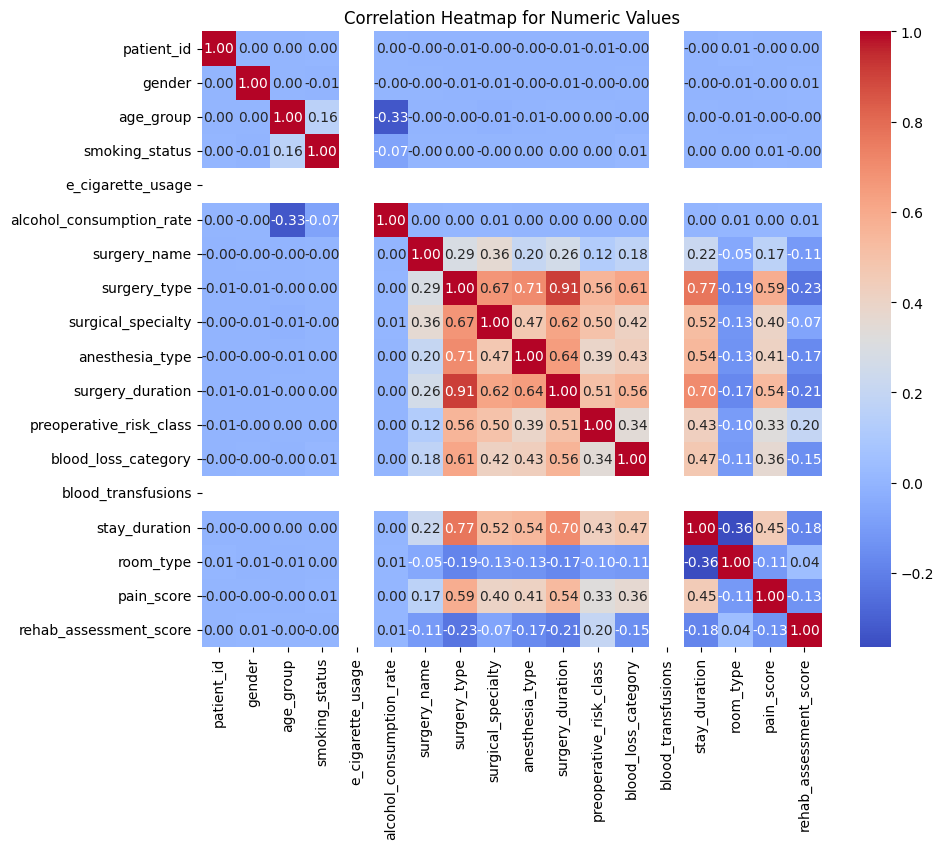

In [23]:
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numeric Values')
plt.show()

In [24]:
"""numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Ensure all numeric columns contain only numbers
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Initialize a correlation matrix
correlation_matrix = pd.DataFrame(index=categorical_cols, columns=numeric_cols)

# Calculate correlations
for cat_col in categorical_cols:
    # Drop rows with NaN in the categorical column
    df_cat = df[cat_col].dropna()

    if df_cat.nunique() == 2:  # Binary categorical variables
        # Map binary categories to 0 and 1
        df[cat_col] = df[cat_col].astype('category').cat.codes
        for num_col in numeric_cols:
            num_data = df[num_col].dropna()  # Drop NaN values in numeric column
            if len(num_data) == len(df[cat_col]):
                correlation, _ = pointbiserialr(df[cat_col], num_data)
                correlation_matrix.loc[cat_col, num_col] = correlation
    else:  # Multiclass categorical variables
        for num_col in numeric_cols:
            # Drop NaN values in numeric column and categorical column
            valid_data = df[[num_col, cat_col]].dropna()
            f_val, _ = f_classif(valid_data[[num_col]], valid_data[cat_col].astype('category').cat.codes)
            correlation_matrix.loc[cat_col, num_col] = f_val[0]  # Store F-value

# Convert the correlation matrix to numeric for heatmap
correlation_matrix = correlation_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Numeric and Categorical Variables')
plt.show()"""

"numeric_cols = df.select_dtypes(include=['number']).columns\ncategorical_cols = df.select_dtypes(exclude=['number']).columns\n\n# Ensure all numeric columns contain only numbers\ndf[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')\n\n# Initialize a correlation matrix\ncorrelation_matrix = pd.DataFrame(index=categorical_cols, columns=numeric_cols)\n\n# Calculate correlations\nfor cat_col in categorical_cols:\n    # Drop rows with NaN in the categorical column\n    df_cat = df[cat_col].dropna()\n\n    if df_cat.nunique() == 2:  # Binary categorical variables\n        # Map binary categories to 0 and 1\n        df[cat_col] = df[cat_col].astype('category').cat.codes\n        for num_col in numeric_cols:\n            num_data = df[num_col].dropna()  # Drop NaN values in numeric column\n            if len(num_data) == len(df[cat_col]):\n                correlation, _ = pointbiserialr(df[cat_col], num_data)\n                correlation_matrix.loc[cat_col, num_col] = cor

In [25]:
df['preoperative_risk_class'].value_counts()

preoperative_risk_class
0    31972
2    24224
3    24008
1    19796
Name: count, dtype: int64

In [26]:
X = df.drop(columns=['preoperative_risk_class','patient_id'])
y = df['preoperative_risk_class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

print("Best parameters found: ", grid_search_rf.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [29]:
# Extract the best parameters from the grid search
best_params = grid_search_rf.best_params_

# Initialize the RandomForestRegressor with the best parameters
best_rf = RandomForestClassifier(**best_params)

# Fit the model to the full training data
best_rf.fit(X_train, y_train)

# Make predictions on the test set or future data
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
print("\nROC AUC Score:", roc_auc)

Confusion Matrix:
 [[9498    2    0    0]
 [5973    2    0    0]
 [2494    1    3 4740]
 [   0    0   11 7276]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.69      9500
           1       0.40      0.00      0.00      5975
           2       0.21      0.00      0.00      7238
           3       0.61      1.00      0.75      7287

    accuracy                           0.56     30000
   macro avg       0.44      0.50      0.36     30000
weighted avg       0.45      0.56      0.40     30000


ROC AUC Score: 0.7806320849982206


In [30]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

xgb = XGBClassifier()
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search_xgb.fit(X_train, y_train)

print("Best parameters found: ", grid_search_xgb.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:160: UserWarning: [01:37:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [31]:
# Extract the best parameters from the grid search
best_params = grid_search_xgb.best_params_

# Initialize the RandomForestRegressor with the best parameters
best_xgb = XGBClassifier(**best_params)

# Fit the model to the full training data
best_xgb.fit(X_train, y_train)

# Make predictions on the test set or future data
y_pred_xgb = best_xgb.predict(X_test)
y_pred_proba_xgb = best_xgb.predict_proba(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
roc_auc = roc_auc_score(y_test, y_pred_proba_xgb, multi_class='ovr', average='weighted')
print("\nROC AUC Score:", roc_auc)

c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:160: UserWarning: [01:37:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[9070  419   11    0]
 [5712  257    6    0]
 [2390  103  349 4396]
 [   0    0  528 6759]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.95      0.68      9500
           1       0.33      0.04      0.08      5975
           2       0.39      0.05      0.09      7238
           3       0.61      0.93      0.73      7287

    accuracy                           0.55     30000
   macro avg       0.46      0.49      0.39     30000
weighted avg       0.47      0.55      0.43     30000


ROC AUC Score: 0.7796430189722033


In [32]:
joblib.dump(best_xgb, 'xgb_surgery_risk.pkl')

['xgb_surgery_risk.pkl']